In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

I converted the xlsx file to csv format and changed the names to 'jsc', 'VOC', 'Rsh', 'Rs', 'FF']

In [79]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [80]:
csvF = pd.read_csv('./4BC.csv', header=0, sep=',') 

### Step 2
Next, we create a dataframe containing some cols

In [81]:
dataset = csvF.loc[:,['jsc', 'VOC', 'Rsh', 'Rs', 'FF']]
dataset.shape

(549, 5)

### Step 3
We now need to create a PCA object, and then call the function that performs PCA on the dataset.

In [82]:
pca3 = PCA(n_components=3) #creating a PCA object, while determining the desired number of dimensions
pcComponents = pca3.fit_transform(dataset) #performing PCA using fit_transform on our dataset
pcComponents

array([[-1.43240472e+07, -1.90966586e+06, -2.16728523e+01],
       [-1.63277791e+07, -1.40082426e+06, -3.19813113e+01],
       [-1.50180341e+07, -1.66244592e+06, -2.27304714e+01],
       ...,
       [-1.70595038e+07, -1.15001204e+06, -2.85111723e+01],
       [-1.46676034e+07, -1.46142779e+06, -3.18533860e+01],
       [-1.70412238e+07, -1.21842065e+06, -2.78957860e+01]])

In [83]:
pcComponents.shape

(549, 3)

In [84]:
pca3.explained_variance_ratio_ 


array([8.49368671e-01, 1.50631329e-01, 2.41999101e-12])

### Step 4
we create cleaner df with all PCs

In [85]:
principalDf = pd.DataFrame(data = pcComponents, columns = ['PC1', 'PC2','PC3'])

In [86]:
principalDf


,PC1,PC2,PC3
0,-1.432405e+07,-1.909666e+06,-21.672852
1,-1.632778e+07,-1.400824e+06,-31.981311
2,-1.501803e+07,-1.662446e+06,-22.730471
3,-1.516883e+07,-1.643755e+06,-24.755372
4,-1.489807e+07,-1.625843e+06,-24.726224
...,...,...,...
544,-1.482215e+07,-1.291666e+06,-34.090228
545,-1.453082e+07,-1.555145e+06,-29.872428
546,-1.705950e+07,-1.150012e+06,-28.511172
547,-1.466760e+07,-1.461428e+06,-31.853386


### Step 5
Adding BC col and converting string values in col BC to int

In [87]:
finalDf = pd.concat([principalDf, csvF[['BC']]], axis = 1)
print(finalDf['BC'].unique())
finalDf['BC'].replace({"Ag":1, "Co":2, "Cu":3, "Ni":4} , inplace=True)
print(finalDf['BC'].unique())
finalDf


['Ag' 'Co' 'Cu' 'Ni']
[1 2 3 4]


,PC1,PC2,PC3,BC
0,-1.432405e+07,-1.909666e+06,-21.672852,1
1,-1.632778e+07,-1.400824e+06,-31.981311,1
2,-1.501803e+07,-1.662446e+06,-22.730471,1
3,-1.516883e+07,-1.643755e+06,-24.755372,1
4,-1.489807e+07,-1.625843e+06,-24.726224,1
...,...,...,...,...
544,-1.482215e+07,-1.291666e+06,-34.090228,4
545,-1.453082e+07,-1.555145e+06,-29.872428,4
546,-1.705950e+07,-1.150012e+06,-28.511172,4
547,-1.466760e+07,-1.461428e+06,-31.853386,4


### Step 5
Now we can visualize 

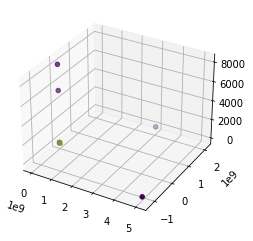

In [88]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(finalDf['PC1'], finalDf['PC2'],finalDf['PC3'],c=finalDf['BC'])

plt.show()